In [6]:
# Load libraries
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from matplotlib import pyplot
from numpy import where
from numpy import mean


In [2]:
# define random dataset using make_classification function
X, Y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)

# Summarize class distribution
counter = Counter(Y)
print(counter) #9900 observation of 0 and 100 observation of 1

# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print("Estimate: %.3f" % estimate)


Counter({0: 9900, 1: 100})
Estimate: 99.000


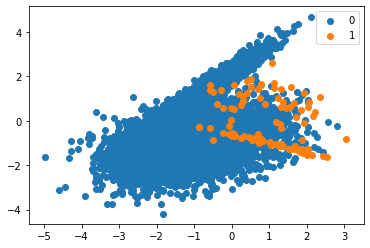

In [3]:
# Data Visualization: Scatter plot of the dataset by class label

for label, _ in counter.items():
    row_ix = where(Y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [4]:
# Model building

# define model
model = XGBClassifier()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print("Mean ROC AUC: %.5F" % mean(scores))

Mean ROC AUC: 0.95372


In [8]:
# Tune the class weighting hyperparameter

# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight = weights)

# define evaluation procedure 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X,Y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960155 using {'scale_pos_weight': 1000}
0.953721 (0.035950) with: {'scale_pos_weight': 1}
0.958254 (0.028362) with: {'scale_pos_weight': 10}
0.957892 (0.027283) with: {'scale_pos_weight': 25}
0.959157 (0.027430) with: {'scale_pos_weight': 50}
0.959241 (0.028015) with: {'scale_pos_weight': 75}
0.959305 (0.028286) with: {'scale_pos_weight': 99}
0.959505 (0.028213) with: {'scale_pos_weight': 100}
0.960155 (0.028721) with: {'scale_pos_weight': 1000}
